In [1]:
import numpy as np
from quantumwalks import QWs, plot_horizontal_line_with_steps
from hybridoperations import Bases_preparation_AQKD, measure_message_AQKD

Bases_preparation = Bases_preparation_AQKD
measure_message = measure_message_AQKD

#Define pre-shared master key
omega = 0 # Angle for the initial coin state
theta0 = np.pi / 3 # Angle for C0 , 60deg
theta1 = np.pi  / 4 # Angle for C1 , 45 deg
theta2 = np.pi / 5 # Angle for C2  , 36 deg


## ALICE

In [3]:
#### Step 1
#Alice Announces N=6 and runs QWs to generate a random bit string B in {0,1}^8N (classical channel)
N=6
B=QWs(N,'','',omega,theta0,theta1,theta2)
print("Alice's B: ", B)

Alice's B:  [1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [6]:
#### Step 3
# Alice prepares and sends a sequence of photons S from Z-basis and x-basis according to B, records the bit values in R
# S is sent through a quantum channel. 
#print ('bases used is                : ', B)
S,R_Alice=Bases_preparation(B)
print('The value R recorded by Alice :',R_Alice)
print("sending photons...")

The value R recorded by Alice : [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]
sending photons...


In [9]:
#### Step 5
# Alice Announces N_check=4 (for example) and generate a bit string K_check_Alice using QWs and R as a message (classic channel)
N_check=4
K_check_Alice=QWs(N_check,'',R_Alice,omega,theta0,theta1,theta2)
print("K_check_Alice: ", K_check_Alice)

K_check_Alice:  [1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


ALICE: Are the equations correct? True


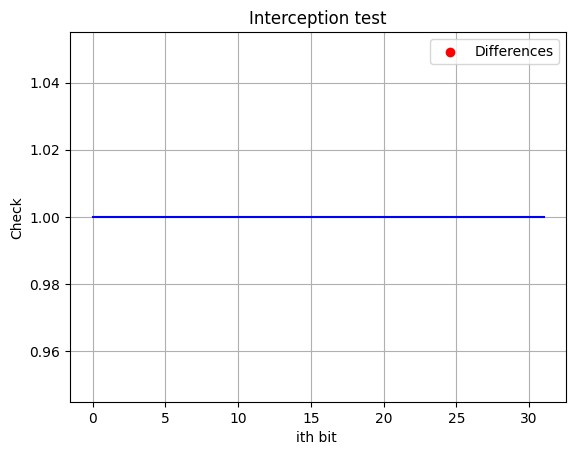

In [18]:
#### Step 7
# Alice sends the first half of K_check_Alice to Bob, Bob verifies if it matches his K_check_Bob
# Bob sends the second half of K_check_Bob to Alice, Alice checks its value. 
# if any equality test fails , the protocol is aborted. 
print('ALICE: Are the equations correct?' , np.array_equal(K_check_Alice,K_check_Bob)) 
plot_horizontal_line_with_steps(K_check_Alice, K_check_Bob)

In [15]:
#### Step 8
# Alice Announces N_key=12 (for example) and generate a bit string K_Nkey using QWs and R as a message (classic channel)
N_key=12
K_Nkey_Alice=QWs(N_key,'',R_Alice,omega,theta0,theta1,theta2)
print("K_Nkey_Alice: ", K_Nkey_Alice)

K_Nkey_Alice:  [0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## BOB

In [4]:
#### Step 2
# Bob generates bit string  B after receiving N
B=QWs(N,'','',omega,theta0,theta1,theta2)
print("Bob's B: ", B)

Bob's B:  [1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


### Eve's interception

In [24]:
### eves intercept the quantum communication channel and performs a measurement. 
intercepted_results = measure_message(S, B)

In [7]:
#### Step 4
#Bob receives S and measures S, then stores the measurements on R_Bob
Bob_results = measure_message_AQKD(S, B)
print("receiving photons...")
print('  Bob\' measurement  :          ', Bob_results)

receiving photons...
  Bob' measurement  :           [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]


In [11]:
#### Step 6
#Bob uses N_check and the values of his measurements (Bob_results) to compute a bit string K_check_Bob
K_check_Bob=QWs(N_check,'',Bob_results,omega,theta0,theta1,theta2)
print("K_check_Bob: ", K_check_Bob)

K_check_Bob:  [1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


BOB: Are the equations correct? True


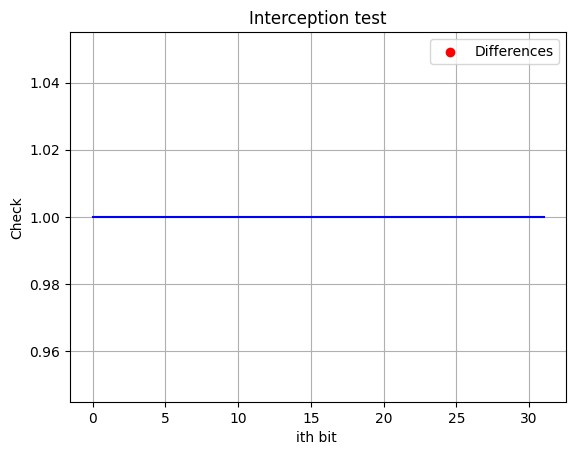

In [12]:
#### Step 7
# Alice sends the first half of K_check_Alice to Bob, Bob verifies if it matches his K_check_Bob
# Bob sends the second half of K_check_Bob to Alice, Alice checks its value. 
# if any equality test fails , the protocol is aborted. 
print('BOB: Are the equations correct?' , np.array_equal(K_check_Alice,K_check_Bob)) 
plot_horizontal_line_with_steps(K_check_Alice, K_check_Bob)

In [17]:
#### Step 9
#Bob uses N_check and the values of his measurements (Bob_results) to compute a bit string K_check_Bob
K_Nkey_Bob=QWs(N_key,'',Bob_results,omega,theta0,theta1,theta2)
print("K_Nkey_Bob: ", K_Nkey_Bob)

K_Nkey_Bob:  [0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
